# What Factors Affect Loan's Outcome Status
## by Omar Elsherif

## Investigation Overview

> In this investigation, I wanted to look at the factors that affect loans and also the borrower characteristics to know more about the interest rate. I also what to check the Employment Status and the kind of risk the borrower will take.

## Dataset Overview

> This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. But I choosed only the variables that make interest in our exploration and they are bout 20 variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv("prosperLoanData.csv")

In [4]:
df_loans = loans.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Borrower APR Distribution (%)

> We see that the Borrower APR is normally distrubuted with the peak between 15 and 20 percent in addition we have some increase in the 35 percent

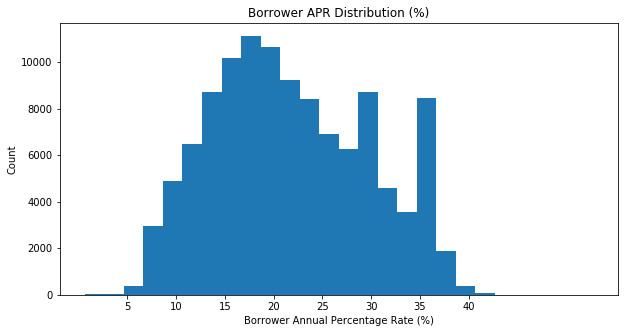

In [5]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrowe_APR_percentage = df_loans['BorrowerAPR']*100
bins = np.arange(df_loans['BorrowerAPR'].min()*100, df_loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrowe_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()


## Loan Original Amount distribution with Log scale

> The highest value for original loan amount is between 3K and 5K. Also I notice increase in amount between 10K and 20K

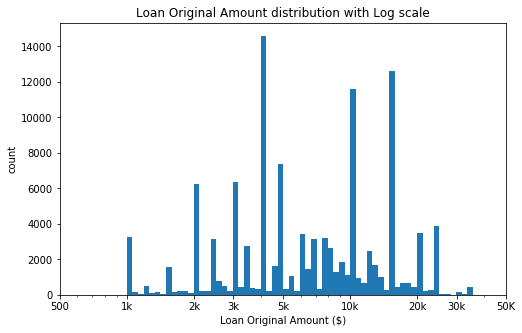

In [6]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

## Amount Delinquent Distribution on Log-scale

> It is obvious that most amounts delinquent falls around $1000 and it is normally distibuted

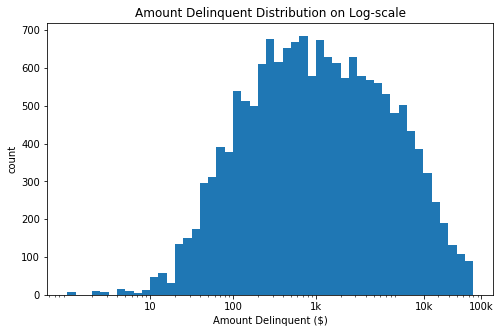

In [7]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

## Investers on log scale
>Number of investors (for data with number of inestoers more than 1) is almost normally distributed around 100 and that was expected from the previce one

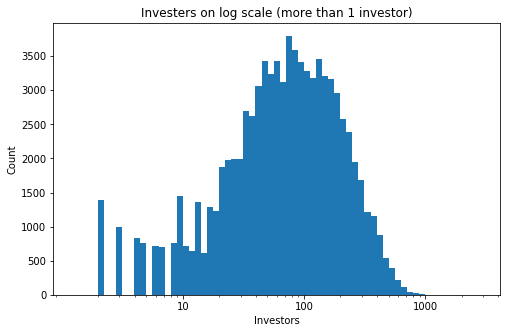

In [8]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

## LoanOriginalAmount and BorrowerAPR
>We see negative relationship between loan original amount and borrower apr, means large loans have relatively less annual interest rate from the borrower.

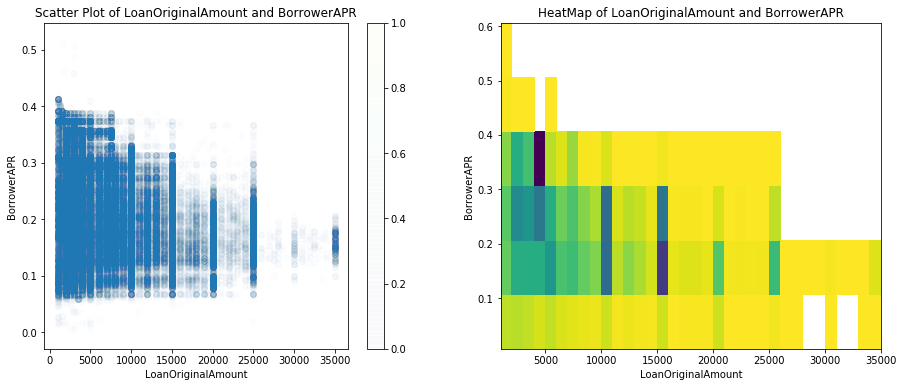

In [9]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.01)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(df_loans['LoanOriginalAmount'].min(), df_loans['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df_loans['BorrowerAPR'].min(), df_loans['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

##  Borrower APR vs Employment status
> On Borrower APR vs Employment status graph we notice that Employed people have lower IQR than not employed

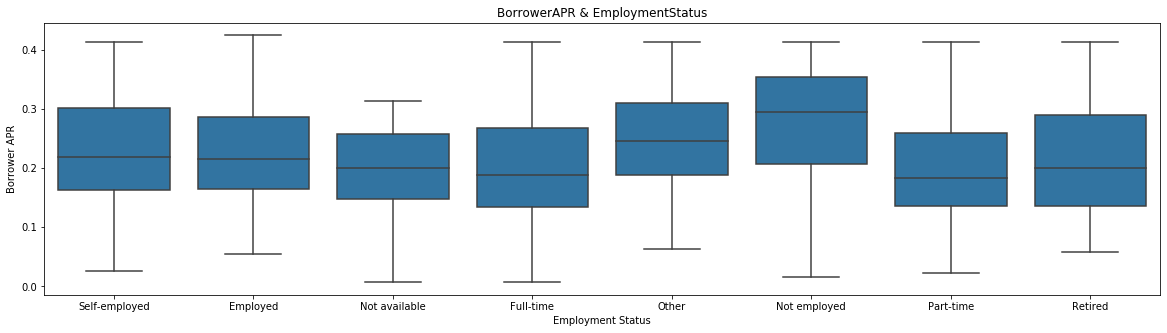

In [10]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_loans,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

## LenderYield vs Borrower APR  vs ProsperRating
>We can see that the relationship between all variables are clear. Borrower APR and Lender yield are directly positively correlated as when the interest borrowers pays more , the lender yield will increase. Higher the prosper score lower will lower borrower apr and then the lender yield will also be lower.

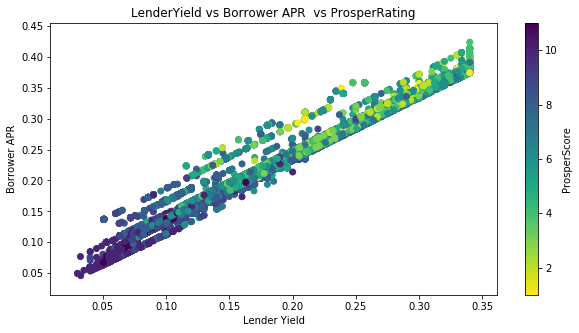

In [11]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loans,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');


## BorrowerAPR vs. ProsperScore using LoanOriginalAmount
>We can see that most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

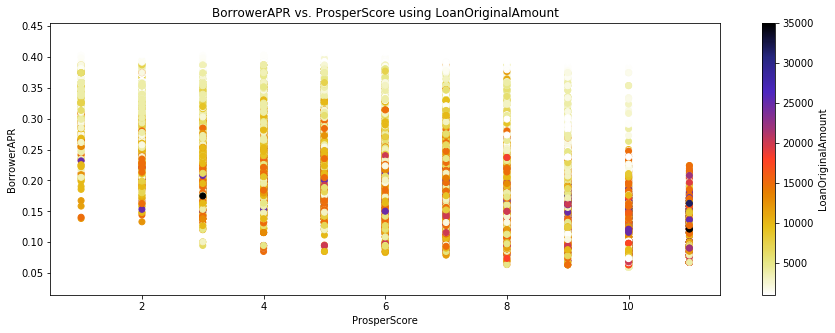

In [12]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=df_loans[df_loans['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

In [ ]:
!jupyter nbconvert Project_3_Loans_Data_Visualization_Slides_(Omar_Elsherif)_part2 --to slides --post serve --template output_toggle



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!